In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
!pip install contractions
# import contractions
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
!pip install pyspellchecker
from spellchecker import SpellChecker

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 286kB 5.7MB/s 
     |████████████████████████████████| 327kB 12.3MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85397 sha256=f06687299dd38d3b4534c18e3c7dd4de47d8b558de78af802bfdf95acf252e31
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 2.7MB 4.0MB/s 


In [ ]:
#train data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
#extraxt text column
train_text_df=train_df["text"]
test_text_df=test_df["text"]

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
print('There are {} rows and {} columns in train'.format(train_df.shape[0],train_df.shape[1]))
print('There are {} rows and {} columns in test'.format(test_df.shape[0],test_df.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in test


In [ ]:
null_counts = pd.DataFrame({"Num_Null": train_df.isnull().sum()})
# null_counts["Pct_Null"] = null_counts["Num_Null"] / train_df.count() * 100
null_counts

,Num_Null
id,0
keyword,61
location,2533
text,0
target,0


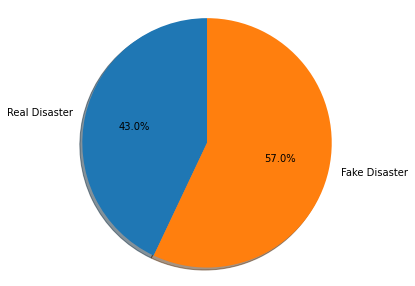

In [ ]:
df_label=train_df.target
fig = plt.figure(figsize=(5, 5))

labels = 'Real Disaster', 'Fake Disaster'

sizes = [sum(df_label==1), sum(df_label==0)] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')  

plt.show()

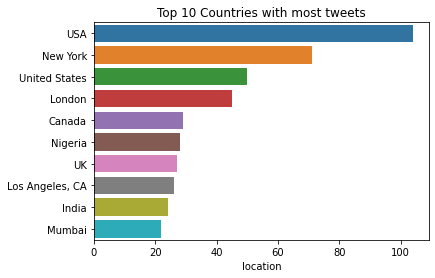

In [ ]:
locations_vc = train_df["location"].value_counts()
sns.barplot(y=locations_vc[0:10].index, x=locations_vc[0:10], orient='h')
plt.title("Top 10 Countries with most tweets")
plt.show()

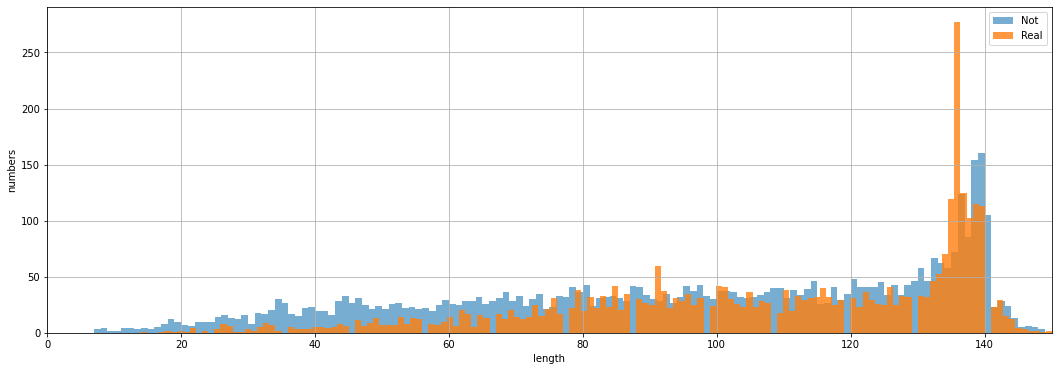

In [ ]:
def length(string):    
    return len(string)
train_df['length'] = train_df['text'].apply(length)
# Sentence length analysis
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(train_df[train_df['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(train_df[train_df['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

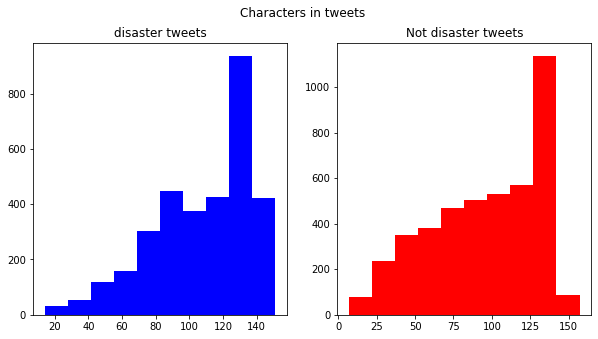

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train_df[train_df['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=train_df[train_df['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

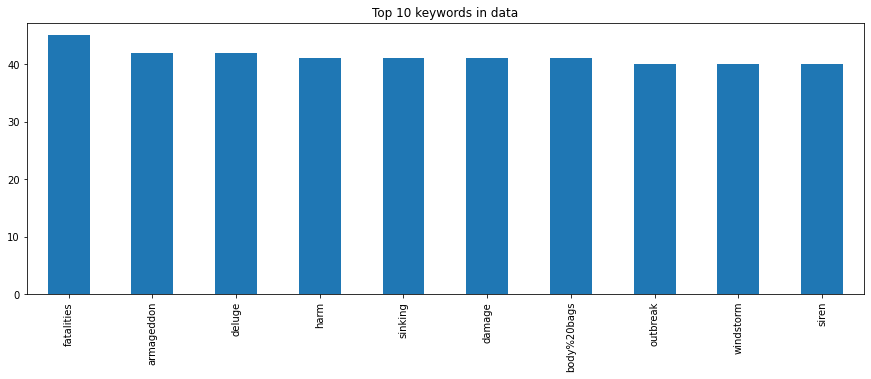

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
train_df.keyword.value_counts()[:10].plot(kind="bar")
ax.set_title("Top 10 keywords in data")
plt.show()

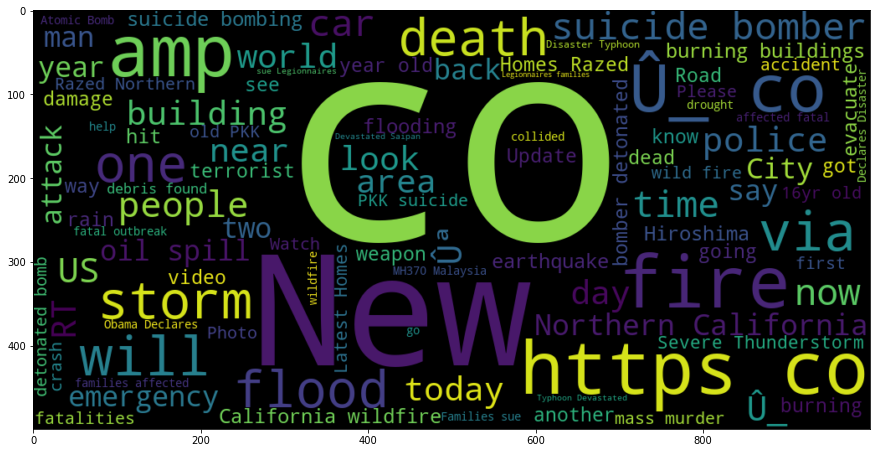

In [ ]:
# WordCloud for Disaster Tweets
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 100 , width = 1000 ,height = 500 , stopwords = STOPWORDS).generate(" ".join(train_df[train_df.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
train_df["tweet_length"] = train_df["text"].apply(len)
min(train_df["tweet_length"]), max(train_df["tweet_length"])

(7, 157)

In [ ]:
train_df["text"].shape

(7613,)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


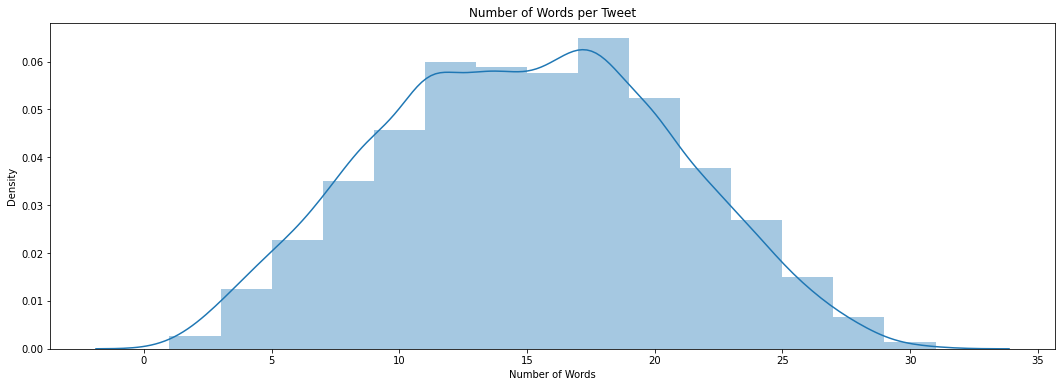

In [ ]:
def count_words(x):
    return len(x.split())

train_df["count_words"] = train_df["text"].apply(count_words)
sns.distplot(train_df["count_words"], bins=15)
plt.title("Number of Words per Tweet")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.show()

Removing URL tags such as www. and https.
Removing HTML tags
Removing all other noise except alphabets such as emojis etc
Lemmatizing each word (Can also use stemming and spell checking if required)
Removing stop words if there are any.

In [ ]:
stop_words=nltk.corpus.stopwords.words('english')
i=0

wnl=WordNetLemmatizer()

for doc in train_df.text:
    doc=re.sub(r'https?://\S+|www\.\S+','',doc)
    doc=re.sub(r'<.*?>','',doc)
    doc=re.sub(r'[^a-zA-Z\s]','',doc,re.I|re.A)
    doc=' '.join([wnl.lemmatize(i) for i in doc.lower().split()])
    

    tokens=nltk.word_tokenize(doc)
    filtered=[token for token in tokens if token not in stop_words]
    doc=' '.join(filtered)
    train_df.text[i]=doc
    i+=1
i=0
for doc in test_df.text:
    doc=re.sub(r'https?://\S+|www\.\S+','',doc)
    doc=re.sub(r'<.*?>','',doc)
    doc=re.sub(r'[^a-zA-Z\s]','',doc,re.I|re.A)
    #doc=' '.join([stemmer.stem(i) for i in doc.lower().split()])
    doc=' '.join([wnl.lemmatize(i) for i in doc.lower().split()])
    #doc=' '.join([sc.correction(i) for i in doc.split()])

    tokens=nltk.word_tokenize(doc)
    filtered=[token for token in tokens if token not in stop_words]
    doc=' '.join(filtered)
    test_df.text[i]=doc
    i+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquake may allah forgive u,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,resident asked shelter place notified officer ...,1
3,6,NaN,NaN,people receive wildfire evacuation order calif...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfire pour...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# vectorize and represent a collection of text documents. 
# It tokenizes the input text and builds a vocabulary of known words and then represents the documents using this vocabulary.
count_vect = CountVectorizer(ngram_range=(1,2))
X = count_vect.fit_transform(train_df['text'])
X_test = count_vect.transform(test_df['text'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
# This downscales words that appear a lot across documents.
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
X_test_tfidf = tfidf_transformer.transform(X_test)

In [ ]:
y_train=train_df['target']

In [ ]:
X.shape,y_train.shape

((7613, 61734), (7613,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, y_train, test_size=0.3, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
eval_set = [(x_test, y_test)]
model = xgb.XGBClassifier()
gs=model.fit(X_train,Y_train,eval_metric="auc", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(x_test)
# predictions = [round(value) for value in y_pred]
# accuracy = accuracy_score(y_test, y_pred)

[0]	validation_0-auc:0.540435
[1]	validation_0-auc:0.560579
[2]	validation_0-auc:0.581141
[3]	validation_0-auc:0.591091
[4]	validation_0-auc:0.591317
[5]	validation_0-auc:0.591761
[6]	validation_0-auc:0.595857
[7]	validation_0-auc:0.599939
[8]	validation_0-auc:0.60433
[9]	validation_0-auc:0.622518
[10]	validation_0-auc:0.630416
[11]	validation_0-auc:0.633776
[12]	validation_0-auc:0.638743
[13]	validation_0-auc:0.639424
[14]	validation_0-auc:0.647293
[15]	validation_0-auc:0.647474
[16]	validation_0-auc:0.658973
[17]	validation_0-auc:0.668086
[18]	validation_0-auc:0.673377
[19]	validation_0-auc:0.677563
[20]	validation_0-auc:0.680368
[21]	validation_0-auc:0.679964
[22]	validation_0-auc:0.679618
[23]	validation_0-auc:0.686315
[24]	validation_0-auc:0.688412
[25]	validation_0-auc:0.690461
[26]	validation_0-auc:0.690819
[27]	validation_0-auc:0.690905
[28]	validation_0-auc:0.698504
[29]	validation_0-auc:0.702613
[30]	validation_0-auc:0.702752
[31]	validation_0-auc:0.702868
[32]	validation_0-a

In [ ]:
y_test_xg=model.predict(x_test)


In [ ]:
y_test=model.predict(X_test)
test_df["target"]=y_test
output=test_df[["id","target"]]
output.to_csv('submissionxgb.csv', index=False, header=True)

Accuracy score for TF-IDF:  1.0


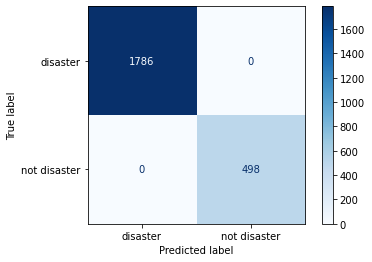

In [ ]:
#Confusion Matrix Plots for both cases on the training splits
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

labels = ['disaster', 'not disaster']
title_idf = 'XGBoost Confusion Matrix'
y_test_xg=model.predict(x_test)
print("Accuracy score for TF-IDF: ", accuracy_score(y_pred, y_test_xg))
# plot_confusion_matrix(estimator = model ,display_labels = labels, cmap=plt.cm.Blues, X=x_test, y_true=y_test)
plot_confusion_matrix(model, x_test, y_test_xg, cmap="Blues",display_labels = labels, values_format='d')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['not disaster', 'disaster']
print(classification_report(y_test, y_test_xg, target_names=target_names))

              precision    recall  f1-score   support

not disaster       0.70      0.94      0.80      1318
    disaster       0.85      0.44      0.58       966

    accuracy                           0.73      2284
   macro avg       0.77      0.69      0.69      2284
weighted avg       0.76      0.73      0.71      2284



In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#Hyperparameter optimization for Logistic Regression with Count Vecotorized Input
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
model = LogisticRegression()
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_tf = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_tf = grid_search_tf.fit(X_tfidf, y_train)
print("Best: %f using %s" % (grid_result_tf.best_score_, grid_result_tf.best_params_))

Best: 0.803582 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
#Hyperparameter optimization for Logisitc Regression with TF-IDF Vectorization Input
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
model = LogisticRegression()
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_cv = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_cv = grid_search_cv.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result_cv.best_score_, grid_result_cv.best_params_))

Best: 0.794580 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
#Using TD-IDF vectorizer
logisitc_regression_tf = LogisticRegression(C=10, penalty='l2', solver='newton-cg').fit(X_tfidf, y_train)
y_pred_logistic_tf = logisitc_regression_tf.predict(X_test_tfidf)
test_df["target"]=y_pred_logistic_tf
output=test_df[["id","target"]]
output.to_csv('submissionLogisticTfIdf.csv', index=False, header=True)

In [ ]:
y_test_pred = logisitc_regression_tf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['not disaster', 'disaster']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

not disaster       0.98      0.95      0.97      1318
    disaster       0.93      0.98      0.96       966

    accuracy                           0.96      2284
   macro avg       0.96      0.96      0.96      2284
weighted avg       0.96      0.96      0.96      2284



In [ ]:
#Using the Count Vecorizer
logisitc_regression_cv = LogisticRegression(C=1.0, penalty='l2', solver='liblinear').fit(X_train, Y_train)
y_pred_logistic = logisitc_regression_cv.predict(X_test)
test_df["target"]=y_pred_logistic
output=test_df[["id","target"]]
output.to_csv('submissionLogisticCV.csv', index=False, header=True)
#Gave an accuracy of 80%

Accuracy score for CV:  0.8375727857799571


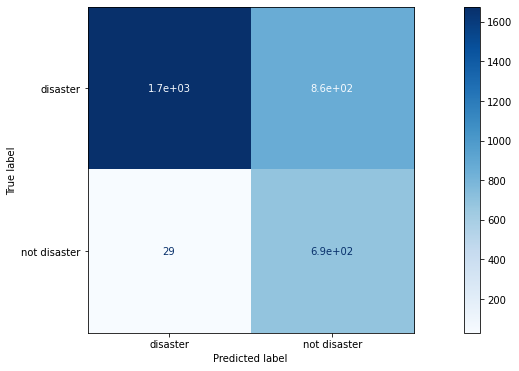

In [ ]:
#Count Vectorizer
y_pred_cv_cm = logisitc_regression_cv.predict(X_test)
print("Accuracy score for CV: ", accuracy_score(y_pred_cv_cm, y_test))
plot_confusion_matrix(estimator = logisitc_regression_tf ,display_labels = labels, cmap=plt.cm.Blues, X=X_test, y_true=y_test)